# Library Installation

In [1]:
!pip install alpha_vantage 

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.3-cp36-none-any.whl size=14872 sha256=e665b8b3309b5ebe27bf82f58c6ed6be1f403bf6a15ecc5f625a00bdf8ce8dfc
  Stored in directory: /root/.cache/pip/wheels/d4/75/c2/483b0a988fd965b1128c1396a0ffadfb8903bd2bb569220048
Successfully built alpha-vantage


# Imports and API Token

In [0]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

import matplotlib.pyplot as plt

# Your api token key goes here
key = 'AAD5YZT8J04D5WL5'

# Examples

## Pandas get intraday data

In [0]:
ts = TimeSeries(key=key, output_format='pandas')
aapl, meta = ts.get_intraday(symbol='BOVA11.SAO')

print(aapl)
print(meta)

## Get symbol search

In [7]:
ts = TimeSeries(key=key)
ts.get_symbol_search(keywords='ambev')

([{'1. symbol': 'ABEV.ARG',
   '2. name': 'AMBEV SA',
   '3. type': 'Equity',
   '4. region': 'Argentina',
   '5. marketOpen': '11:00',
   '6. marketClose': '17:00',
   '7. timezone': 'UTC-03',
   '8. currency': 'ARS',
   '9. matchScore': '0.8889'},
  {'1. symbol': 'ABEV',
   '2. name': 'Ambev S.A.',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-05',
   '8. currency': 'USD',
   '9. matchScore': '0.7692'},
  {'1. symbol': 'ABEV3.SAO',
   '2. name': 'Ambev S.A.',
   '3. type': 'Equity',
   '4. region': 'Brazil/Sao Paolo',
   '5. marketOpen': '10:00',
   '6. marketClose': '17:30',
   '7. timezone': 'UTC-03',
   '8. currency': 'BRL',
   '9. matchScore': '0.6667'},
  {'1. symbol': 'AMNA.FRK',
   '2. name': 'Ambev S.A.',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+01',
   '8. currency': 'EUR',
   '9. matchScore

## Get daily data from ambev

In [0]:
ts = TimeSeries(key=key, output_format='pandas')
ambev, meta = ts.get_daily(symbol='ABEV3.SAO', outputsize='full')

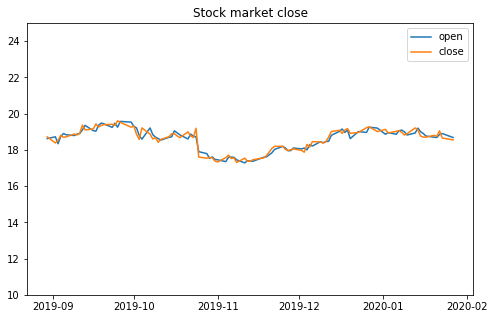

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-01-27    18.68    18.79   18.46     18.55  12916900.0
2020-01-23    18.90    19.03   18.59     18.65  20155900.0
2020-01-22    18.85    19.08   18.77     19.05  13925400.0
2020-01-21    18.68    18.92   18.66     18.74  11249000.0
2020-01-20    18.70    18.88   18.58     18.80   8035600.0
...             ...      ...     ...       ...         ...
2019-09-05    18.90    19.00   18.69     18.69  15042800.0
2019-09-04    18.74    18.86   18.57     18.80  15174900.0
2019-09-03    18.34    18.85   18.26     18.52  20597800.0
2019-09-02    18.72    18.92   18.38     18.38   8064200.0
2019-08-30    18.62    18.89   18.57     18.72  22981700.0

[100 rows x 5 columns]


In [29]:
plt.figure(figsize=(8,5))
plt.title('Stock market close')
plt.ylim((10,25))
plt.plot(ambev.index, ambev['1. open'], label='open')
plt.plot(ambev.index, ambev['4. close'], label='close')
plt.legend()
plt.show()

print(ambev)

# Technical Indicators

## Get technical indicators for ambev

In [0]:
ti = TechIndicators(key=key, output_format='pandas')

symbol = 'ABEV3.SAO'
interval = 'daily'
series_type = 'open'

# Bollinger Bands
bbands_ambev, ambev_meta = ti.get_bbands(symbol=symbol, interval=interval, time_period=60, series_type=series_type)
bbands_ambev = bbands_ambev.sort_index(ascending=False)
# SMA10 or MA10
sma_10_ambev, ambev_meta = ti.get_sma(symbol=symbol, interval=interval, time_period=10, series_type=series_type)
sma_10_ambev = sma_10_ambev.sort_index(ascending=False)
# SMA5 or MA5
sma_5_ambev, ambev_meta = ti.get_sma(symbol=symbol, interval=interval, time_period=5, series_type=series_type)
sma_5_ambev = sma_5_ambev.sort_index(ascending=False)

## Visualization of Technical Indicators

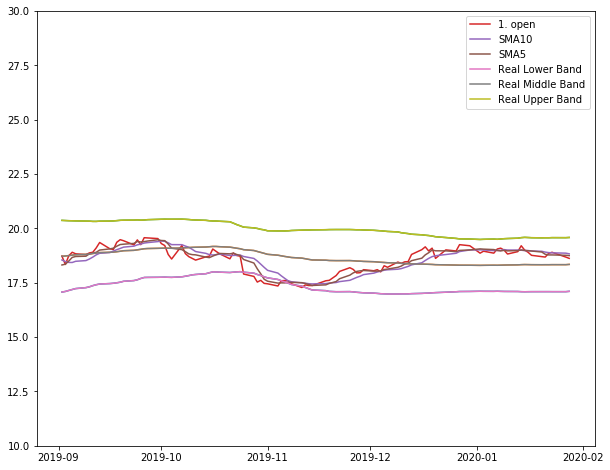

In [75]:
d1 = ambev[:100]
d2 = sma_10_ambev[:100]
d3 = sma_5_ambev[:100]
d4_1 = bbands_ambev['Real Lower Band'][:100]
d4_2 = bbands_ambev['Real Middle Band'][:100]
d4_3 = bbands_ambev['Real Upper Band'][:100]



plt.figure(figsize=(10,8))
plt.plot(bbands_ambev[:100])
plt.plot(d1.index, d1['1. open'], label='1. open')
plt.plot(d2.index, d2['SMA'], label='SMA10')
plt.plot(d3.index, d3['SMA'], label='SMA5')
plt.plot(d4_1, label='Real Lower Band')
plt.plot(d4_2, label='Real Middle Band')
plt.plot(d4_3, label='Real Upper Band')
plt.ylim((10,30))
plt.legend()

In [0]:
#ibovespa.to_csv('ibovespa_2008-12-02_2020-01-27.csv')

ibovespa, meta = ts.get_daily(symbol='IBOV')
ibovespa